## Crawling Data Kompas.com Indonesia News Website

**Crawling** merupakan proses search engine untuk menemukan konten atau sesuatu situs halaman yang ada. Dalam bahasa lainnya crawling atau *web crawling* merupakan proses dimana search engine mengirimkan bot atau robot yang disebut (crawler atau spider) yang digunakan untuk menemukan konten-konten yang ada.

Yang dimaksud konten yaitu bervariasi, mulai dari halaman website yang saya lakukan ini, kemudian gambar, video, dokumen, dan lain sebagainya. Seperti halnya laba-laba, datang ke sebuah jaring dan melihat beberapa halaman website, kemudian mengikuti link yang terdapat di halaman website tersebut untuk mencari URL yang baru.

Ketika ada pengguna yang mencari sebuah konten di search engine dengan keyword tertentu, search engine akan mencarinya di indeks dan menentukan konten mana yang paling sesuai untuk pengguna tersebut.

### Library yang digunakan

In [ ]:
#library crawling
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd #dataframe
from tqdm import tqdm #monitoring

Penjelasan singkat library yang digunakan:
*   **urlopen** berfungsi sebagai http client untuk menangkap dan memproses url
*   **BeautifulSoup** berfungsi untuk mengambil dan memetakan data (parse) dari HTML/XML
*   **pandas** berfungsi untuk memproses data ke dalam dataframe
*   **tqdm** berfungsi untuk melakukan tracking terhadap proses pengambilan setiap berita

### Function Prepare Crawling Data Link Website

In [ ]:
# fungsi untuk mengambil link berita
def extract_urls(url):
    html = urlopen(url).read()
    soup = BeautifulSoup(html, 'html.parser')

    urls = soup.find_all("a", {"class": "paging__link"})
    urls = [url.get('href') for url in urls]

    return urls

# fungsi untuk mengambil isi dari berita
def get_content(url):
    html = urlopen(url).read()
    soup = BeautifulSoup(html, 'html.parser')

    div = soup.find("div", {"class": "read__content"})
    paragraf = div.find_all("p")

    content = ''
    for p in paragraf:
        content += p.text

    return content

*   function **extract_urls** digunakan untuk melakukan ekstraksi
link url yang memiliki pagination pada halaman awal, sehingga didapat beberapa url yang bisa mengarah ke halaman selanjutnya atau sebelumnya.

*   function **get_content** digunakan untuk melakukan proses pembuatan isi berita sesuai link berita yang dicari.

### Crawling Data Kompas.com

Pada tahap kali ini dilakukan proses crawling data terhadap berita dari url yang akan dicari, yaitu Kompas.com. Berikut ini merupakan beberapa variabel yang perlu disiapkan:

* **news** digunakan untuk menyimpan data berita hasil crawling
* **link** digunakan untuk menentukan url website yang akan dicari
* **page** digunakan untuk menentukan jumlah halaman yang akan dicari
* **news_per_page** digunakan untuk menentukan jumlah berita per halaman
* **urls** digunakan untuk menampung beberapa link yang akan dilakukan proses crawling

In [ ]:
# inisialisasi variabel penampung hasil berita
news_data = []

# inisialisasi persiapan untuk crawling berita
link = "https://indeks.kompas.com"
page = 100 # jumlah halaman secara manual

# persiapan link yang akan dilakukan crawling
urls = [link + '/?page=' + str(a) for a in range(1, int(page) + 1)]

# menelusuri semua link yang telah ditentukan
for idx, url in enumerate(urls):
    html = urlopen(url).read()
    soup = BeautifulSoup(html, 'html.parser')

    # mengambil data dari struktur html
    links       = soup.find_all("a", {"class": "article-link"})
    titles      = soup.find_all("h2", {"class": "articleTitle"})
    dates       = soup.find_all("div", {"class": "articlePost-date"})
    categories  = soup.find_all("div", {"class": "articlePost-subtitle"})

    news_per_page = len(links) # berita artikel yang ditampilkan

    # memasukkan data ke dalam list
    for elem in tqdm(range(news_per_page)):
      news = {}
      news['No']               = news_per_page * idx + (elem + 1)
      news['Judul Berita']     = titles[elem].text
      news['Isi Berita']       = get_content(links[elem].get("href"))
      news['Tanggal Berita']   = dates[elem].text
      news['Kategori Berita']  = categories[elem].text

      news_data.append(news)

100%|██████████| 15/15 [00:10<00:00,  1.41it/s]


Dari proses yang dilakukan diatas, didapatkan data berita yang ada di variabel **news_data** sesuai dengan jumlah halaman dan berita per halaman yang dicari.

### Convert to DataFrames

Selanjutnya, dilakukan proses convert data yang ada ke dalam *dataframe* agar dapat dilihat dalam bentuk tabel dan dimanipulasi sesuai kebutuhan.

In [ ]:
main_df = pd.DataFrame(news_data).set_index('No')
main_df

,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita
No,,,,
1,Zonasi Pendaftaran Siswa Baru Tunggu Keputusan...,"KUDUS, KOMPAS.com – Menteri Pendidikan Dasar d...",01/12/2024,REGIONAL
2,"Hilang Diterjang Longsor Sibolangit, Jasad Sop...",KOMPAS.com - Sopir Toyota Hiace yang diterjang...,01/12/2024,REGIONAL
3,"Ada Pemilih Tiga Kali ""Nyoblos"", PSU Digelar d...","TERNATE, KOMPAS.com – Komisi Pemilihan Umum (K...",01/12/2024,REGIONAL
4,"Prabowo: Bangsa yang Kekayaannya Banyak, Elite...","JAKARTA, KOMPAS.com - Presiden Prabowo Subuant...",01/12/2024,NEWS
5,Petugas KPPS di Kapuas Mencoblos Surat Suara S...,"PALANGKA RAYA, KOMPAS.com – Ketua Kelompok Pan...",01/12/2024,REGIONAL
...,...,...,...,...
1496,"Profil Pendidikan Dedi-Erwan, Cagub-Cawagub ya...",KOMPAS.com - Hasil hitung cepat atau quick cou...,29/11/2024,EDUKASI
1497,Bolehkah Menempatkan Kulkas di Samping Oven?,KOMPAS.com - Tata letak dapur bisa sangat berv...,29/11/2024,HOMEY
1498,"Real Madrid Kalah Lagi di Liga Champions, Modr...","KOMPAS.com - Gelandang Real Madrid, Luka Modri...",29/11/2024,BOLA


### Save Data to CSV

In [ ]:
main_df.to_csv('data_berita_kompas_all.csv', index=False)

## VSM with TF-IDF

### Apa itu VSM?

**Vector Space Model (VSM)** merupakan kerangka kerja matriks yang digunakan dalam *temu kembali informasi* dan *pemrosesan bahasa alami* (NLP) untuk merepresentasikan dan menganalisis data visual. VSM sangat penting dalam penggalian teks, pencarian dokumen, dan tugas-tugas pembelajaran mesin berbasis teks seperti klasifikasi dokumen, pencarian informasi, dan analisis kemiripan teks.

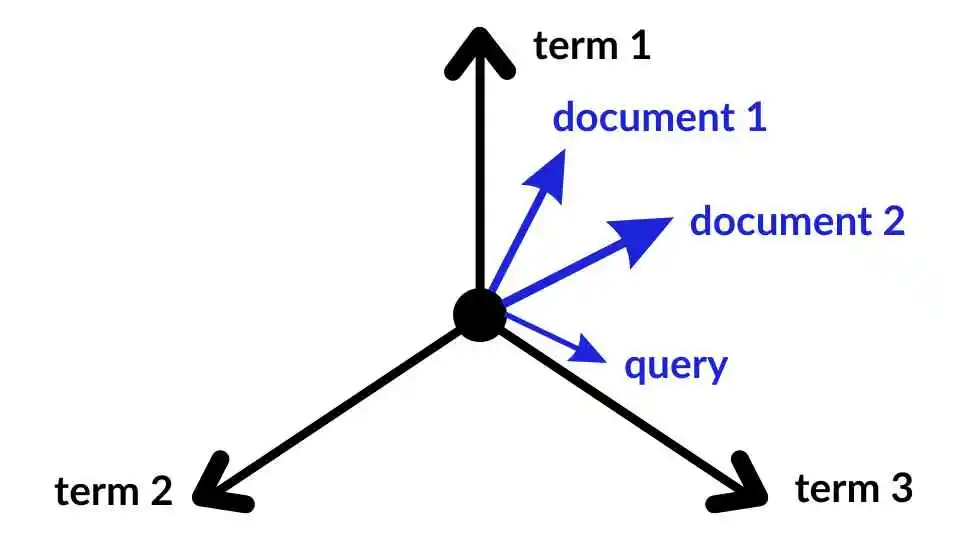

Setiap dimensi berhubungan dengan term yang unik, sementara dokumen dan query dapat direpresentasikan sebagai vektor di dalam ruang tersebut.

### Term Frequency-Inverse Document Frequency (TF-IDF)

**TF-IDF** adalah singkatan dari Term Frequency Inverse Document Frequency. Hal ini dapat didefinisikan sebagai perhitungan seberapa relevan sebuah kata dalam kumpulan atau corpus terhadap sebuah teks. Nilai relevansi meningkat secara relatif terhadap berapa kali sebuah kata muncul di dalam teks, namun dikompensasi oleh frekuensi kata di dalam corpus (kumpulan data).



> tf-idf(t, d) = tf(t, d) * idf(t)



#### Term Frequency (TF)

Pada dokumen d, frekuensi merepresentasikan jumlah kemunculan kata t. Oleh karena itu, kita dapat melihat bahwa frekuensi akan menjadi lebih relevan ketika sebuah kata muncul dalam teks, yang mana hal ini bersifat relatif. Karena urutan istilah tidak signifikan, kita dapat menggunakan vektor untuk mendeskripsikan teks dalam kumpulan model term. Untuk setiap istilah tertentu dalam teks, ada sebuah entri dengan nilai yang merupakan frekuensi term.



> *tf(t,d)* = **count** of *t* in *d* / **number** of *words* in *d*



#### Inverse Document Frequency (IDF)

Pada dasarnya, ini menguji seberapa relevan kata tersebut. Tujuan utama dari pencarian ini merupakan untuk menemukan dokumen yang sesuai dengan pencarian. Karena *tf* menganggap semua istilah sama pentingnya, maka *frekuensi term* tidak hanya dapat digunakan untuk mengukur bobot *term* dalam dokumen. Pertama, cari frekuensi dokumen dari suatu istilah t dengan menghitung jumlah dokumen yang mengandung *term* tersebut.



> **idf(t) = log(N/ df(t))**



Ket:
> df(t) = N(t)

dimana,
* df(t) = Document frequency of a term t
* N(t) = Number of documents containing the term t

### Proses Pembentukan Data ke VSM

#### Import Library yang Digunakan

In [ ]:
!pip install -q Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


In [ ]:
# library >> perhitungan dan pengolahan teks
import numpy as np
import re
import pandas as pd
import pickle
from tqdm import tqdm # monitoring

# library untuk processing teks
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split

# library >> proses pembentukan vsm
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Notes:

Dikarenakan pada processing teks akan melakukan stemming, jadi perlu install library Sastrawi untuk melakukan stemming bahasa indonesia.

* **numpy** digunakan untuk pengolahan angka dan perhitungan matematik

* **re (regular expression)** digunakan untuk mengenali pola kata/kalimat

* **nltk (natural language toolkit)** berfungsi untuk melakukan proses yang berkaitan dengan bahasa (teks).

* **sklearn** digunakan dalam pemrosesan data untuk kebutuhan machine learning atau data science. Dalam tugas ini, menggunakan TfidfVectorizer untuk menghitung Term Frequency dan Inverse Document

#### Load Data

In [ ]:
main_df = pd.read_csv('https://raw.githubusercontent.com/msaifulhuda/ppw/refs/heads/main/dataset/crawling/data_berita_kompas_all.csv', delimiter=',')
main_df

,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita
0,Zonasi Pendaftaran Siswa Baru Tunggu Keputusan...,"KUDUS, KOMPAS.com – Menteri Pendidikan Dasar d...",01/12/2024,REGIONAL
1,"Hilang Diterjang Longsor Sibolangit, Jasad Sop...",KOMPAS.com - Sopir Toyota Hiace yang diterjang...,01/12/2024,REGIONAL
2,"Ada Pemilih Tiga Kali ""Nyoblos"", PSU Digelar d...","TERNATE, KOMPAS.com – Komisi Pemilihan Umum (K...",01/12/2024,REGIONAL
3,"Prabowo: Bangsa yang Kekayaannya Banyak, Elite...","JAKARTA, KOMPAS.com - Presiden Prabowo Subuant...",01/12/2024,NEWS
4,Petugas KPPS di Kapuas Mencoblos Surat Suara S...,"PALANGKA RAYA, KOMPAS.com – Ketua Kelompok Pan...",01/12/2024,REGIONAL
...,...,...,...,...
1495,"Profil Pendidikan Dedi-Erwan, Cagub-Cawagub ya...",KOMPAS.com - Hasil hitung cepat atau quick cou...,29/11/2024,EDUKASI
1496,Bolehkah Menempatkan Kulkas di Samping Oven?,KOMPAS.com - Tata letak dapur bisa sangat berv...,29/11/2024,HOMEY
1497,"Real Madrid Kalah Lagi di Liga Champions, Modr...","KOMPAS.com - Gelandang Real Madrid, Luka Modri...",29/11/2024,BOLA
1498,"Sayembara Cari Harun Masiku, Pernah Dimunculka...","JAKARTA, KOMPAS.com - Sayembara untuk menemuka...",29/11/2024,NEWS


#### EDA (Exploratory Data Analysis)

In [ ]:
main_df.isnull()

,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1495,False,False,False,False
1496,False,False,False,False
1497,False,False,False,False
1498,False,False,False,False


In [ ]:
main_df.isnull().sum()

,0
Judul Berita,0
Isi Berita,0
Tanggal Berita,0
Kategori Berita,0


In [ ]:
main_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1495,False
1496,False
1497,False
1498,False


In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Judul Berita     1500 non-null   object
 1   Isi Berita       1500 non-null   object
 2   Tanggal Berita   1500 non-null   object
 3   Kategori Berita  1500 non-null   object
dtypes: object(4)
memory usage: 47.0+ KB


In [ ]:
main_df.describe()

,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita
count,1500,1500,1500,1500
unique,1489,1489,3,26
top,Catat Ruas Jalan yang Diprediksi Macet Pada Li...,"JAKARTA, KOMPAS.com - Sehubungan dengan perkir...",29/11/2024,REGIONAL
freq,2,2,740,295


#### Text Processing

##### Create Function

In [ ]:
# Case Folding
def clean_lower(lwr):
    lwr = lwr.lower() # lowercase text
    return lwr

# Menghapus tanda baca, angka, dan simbol
def clean_punct(text):
    clean_spcl = re.compile('[/(){}\|@,;_]')
    clean_symbol = re.compile('[^0-9a-z]')
    clean_number = re.compile('[0-9]')
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    text = clean_number.sub('', text)
    return text

# Menghaps double atau lebih whitespace
def _normalize_whitespace(text):
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")

# Menghapus stopwords
def clean_stopwords(text):
    stopword = set(stopwords.words('indonesian'))
    text = ' '.join(word for word in text.split() if word not in stopword) # hapus stopword dari kolom deskripsi
    return text

# Stemming with Sastrawi
def sastrawistemmer(text):
    factory = StemmerFactory()
    st = factory.create_stemmer()
    text = ' '.join(st.stem(word) for word in tqdm(text.split()) if word in text)
    return text

* function **clean_lower** digunakan untuk merubah semua kata atau huruf menjadi huruf kecil semua

* function **clean_punct** digunakan untuk menghapus karakter, simbol, dan angka

* function **_normalize_whitespace** digunakan untuk menghapus spasi yang double atau lebih dari 2 spasi

* function **clean_stopwords** digunakan untuk menghilangkan kata yang tidak perlu (kata hubung, kata tambahan dll)

* function **sastrawistemmer** digunakan untuk proses stemming (mendapatkan kata dasar dari suatu kata)

##### Clean Lower

In [ ]:
main_df['lwr'] = main_df['Isi Berita'].apply(clean_lower)
casefolding=pd.DataFrame(main_df['lwr'])
casefolding

,lwr
0,"kudus, kompas.com – menteri pendidikan dasar d..."
1,kompas.com - sopir toyota hiace yang diterjang...
2,"ternate, kompas.com – komisi pemilihan umum (k..."
3,"jakarta, kompas.com - presiden prabowo subuant..."
4,"palangka raya, kompas.com – ketua kelompok pan..."
...,...
1495,kompas.com - hasil hitung cepat atau quick cou...
1496,kompas.com - tata letak dapur bisa sangat berv...
1497,"kompas.com - gelandang real madrid, luka modri..."
1498,"jakarta, kompas.com - sayembara untuk menemuka..."


##### Clean Punct

In [ ]:
# Buat kolom baru untuk data deskripsi yang telah dilakukan proses penghapusan tanda baca
main_df['clean_punct'] = main_df['lwr'].apply(clean_punct)
main_df['clean_punct']

,clean_punct
0,kudus kompas com menteri pendidikan dasar da...
1,kompas com sopir toyota hiace yang diterjang...
2,ternate kompas com komisi pemilihan umum kpu...
3,jakarta kompas com presiden prabowo subuanto...
4,palangka raya kompas com ketua kelompok pani...
...,...
1495,kompas com hasil hitung cepat atau quick cou...
1496,kompas com tata letak dapur bisa sangat berv...
1497,kompas com gelandang real madrid luka modric...
1498,jakarta kompas com sayembara untuk menemukan...


##### Normalize Whitespace

In [ ]:
main_df['clean_double_ws'] = main_df['clean_punct'].apply(_normalize_whitespace)
main_df['clean_double_ws']

,clean_double_ws
0,kudus kompas com menteri pendidikan dasar dan ...
1,kompas com sopir toyota hiace yang diterjang l...
2,ternate kompas com komisi pemilihan umum kpu p...
3,jakarta kompas com presiden prabowo subuanto m...
4,palangka raya kompas com ketua kelompok paniti...
...,...
1495,kompas com hasil hitung cepat atau quick count...
1496,kompas com tata letak dapur bisa sangat bervar...
1497,kompas com gelandang real madrid luka modric t...
1498,jakarta kompas com sayembara untuk menemukan b...


##### Clean Stopwords

In [ ]:
# Buat kolom baru untuk data deskripsi yang telah dilakukan proses penghapusan stopwords
main_df['clean_sw'] = main_df['clean_double_ws'].apply(clean_stopwords)
main_df['clean_sw']

,clean_sw
0,kudus kompas com menteri pendidikan dasar mene...
1,kompas com sopir toyota hiace diterjang longso...
2,ternate kompas com komisi pemilihan kpu provin...
3,jakarta kompas com presiden prabowo subuanto k...
4,palangka raya kompas com ketua kelompok paniti...
...,...
1495,kompas com hasil hitung cepat quick count lemb...
1496,kompas com tata letak dapur bervariasi bergant...
1497,kompas com gelandang real madrid luka modric p...
1498,jakarta kompas com sayembara menemukan buronan...


##### Stemming with Sastrawi

In [ ]:
# Buat kolom baru untuk data deskripsi yang telah di lemmatization
main_df['desc_clean_stem'] = main_df['clean_sw'].apply(sastrawistemmer)
main_df['desc_clean_stem']

100%|██████████| 218/218 [00:07<00:00, 30.37it/s]


,desc_clean_stem
0,kudus kompas com menteri didik dasar tengah me...
1,kompas com sopir toyota hiace terjang longsor ...
2,ternate kompas com komisi pilih kpu provinsi m...
3,jakarta kompas com presiden prabowo subuanto u...
4,palangka raya kompas com ketua kelompok paniti...
...,...
1495,kompas com hasil hitung cepat quick count lemb...
1496,kompas com tata letak dapur variasi gantung se...
1497,kompas com gelandang real madrid luka modric p...
1498,jakarta kompas com sayembara temu buron komisi...


#### Save Data Processing

In [ ]:
main_df.to_csv("data_berita_kompas_processing_all.csv", index=False)

#### Split Data Training & Data Testing

In [ ]:
data_berita_processing = pd.read_csv('https://github.com/msaifulhuda/ppw/raw/refs/heads/main/dataset/processing/data_berita_kompas_processing_all.csv')

X = data_berita_processing['desc_clean_stem'] # kolom 'desc_clean_stem' sebagai fitur
y = data_berita_processing['Kategori Berita'] # kolom 'Kategori Berita' sebagai target

# bagi data >> train 80% dan test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# membuat dataframe
train_df = pd.DataFrame({'desc_clean_stem': X_train, 'label': y_train})
test_df = pd.DataFrame({'desc_clean_stem': X_test, 'label': y_test})

# menampilkan dataframe training
train_df

,desc_clean_stem,label
382,jakarta kompas com kepala keluarga kk tempat t...,NEWS
538,jakarta kompas com remaja inisial mas bunuh ay...,NEWS
1493,bogor kompas com halaman muat informasi prakir...,REGIONAL
1112,kompas com provinsi indonesia gelar program mu...,TREN
324,jakarta kompas com perintah insentif sektor in...,MONEY
...,...,...
1130,jakarta kompas com anggota komisi iii dpr ri f...,NEWS
1294,kompas com ktt iklim cop baku azerbaijan suara...,LESTARI
860,labu bajo kompas com langit labu bajo jumat pe...,REGIONAL
1459,pekanbaru kompas com halaman muat informasi pr...,REGIONAL


#### Save Data Training & Data Testing

In [ ]:
train_df.to_csv("train_df_all.csv", index=False)
test_df.to_csv("test_df_all.csv", index=False)

### Pembentukan VSM

#### Fitting kata untuk get TF-IDF pada semua Dokumen

In [ ]:
vectorizer = TfidfVectorizer()
corpus = train_df['desc_clean_stem'].tolist()
tfidf = vectorizer.fit_transform(corpus)

print("Shape:", tfidf.shape)

Shape: (1200, 17358)


#### Save Pipeline

In [ ]:
filename = 'tfidf_vectorizer_all.sav'
pickle.dump(vectorizer, open(filename, 'wb'))

#### Create Dataframe

In [ ]:
vocabulary = vectorizer.get_feature_names_out().tolist()

tfidf_df = pd.DataFrame(tfidf.toarray(), columns=vocabulary)
tfidf_df['label'] = train_df['label'].tolist()

tfidf_df

,aa,aac,aaji,aaliyah,aam,aan,aand,aapl,aaron,aau,...,zs,zudan,zulfikar,zulhas,zuli,zulkarin,zulkarnain,zulkarnaini,zulkifli,zxf
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Save to CSV

In [ ]:
tfidf_df.to_csv('train_df_tfidf_all.csv', index=False)

## CNN Implementation

### Import Library yang Digunakan

Pertama, kita perlu menginstal library yang dibutuhkan.  `nlpaug` digunakan untuk augmentasi data, `tensorflow` untuk membangun model CNN, `scikit-learn` untuk pre-processing dan evaluasi, dan `imbalanced-learn` untuk menangani ketidakseimbangan kelas.

In [ ]:
!pip install nlpaug tensorflow scikit-learn imbalanced-learn

Selanjutnya, kita mengimpor library yang diperlukan dan mendefinisikan fungsi untuk augmentasi data.  `nltk` digunakan untuk pemrosesan bahasa alami, `pandas` untuk manipulasi data, `pickle` untuk menyimpan model, `matplotlib` dan `seaborn` untuk visualisasi.

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
import numpy as np
import pandas as pd
import pickle
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import nlpaug.augmenter.word as naw #augmented library
from imblearn.over_sampling import RandomOverSampler #oversample library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv1D, MaxPooling1D, Flatten,
                                   Dense, Dropout, BatchNormalization)

### Function Data Augmentation

Augmentasi data digunakan untuk meningkatkan variasi data pelatihan dengan membuat data baru dari data yang sudah ada.  Ini membantu model untuk menggeneralisasi lebih baik dan mencegah overfitting.  Dua metode augmentasi yang digunakan adalah:

1. **Synonym Replacement (Penggantian Sinonim):**  Mengganti kata dengan sinonimnya menggunakan library `WordNet`.  Contoh: "mobil" diganti dengan "kendaraan".
2. **Random Insertion (Penyisipan Acak):** Menyisipkan kata acak dari teks itu sendiri ke dalam teks di posisi acak.  Contoh: "Saya suka makan apel" menjadi "Saya suka apel makan".

Fungsi `augment_text` digunakan untuk melakukan augmentasi, dan fungsi `augment_sr` dan `augment_ri` merupakan pembungkus (wrapper) untuk metode augmentasi spesifik.

In [ ]:
# Fungsi untuk augmentasi teks
def augment_text(text, augmenter):
    augmented_text = augmenter.augment(text)
    if isinstance(augmented_text, list):
      augmented_text = ' '.join(augmented_text)
    return augmented_text

aug_sr = naw.SynonymAug(aug_src='wordnet')

# Augmentasi sinonim
def augment_sr(text):
  return augment_text(text,aug_sr)

# Augmentasi random insertion
aug_ri = naw.RandomWordAug(aug_min=1, aug_max=10)
def augment_ri(text):
    return augment_text(text,aug_ri)

### Load Dataset

Kita memuat dataset dari URL yang diberikan, kemudian melakukan augmentasi data dengan menambahkan sinonim dan menyisipkan kata acak. Kolom 'desc_combined' berisi teks gabungan dari teks asli, augmentasi sinonim, dan augmentasi random insertion.

In [ ]:
main_df = pd.read_csv('https://github.com/msaifulhuda/ppw/raw/refs/heads/main/dataset/processing/data_berita_kompas_processing_all.csv')

In [ ]:
main_df['desc_aug_sr'] = main_df['desc_clean_stem'].apply(augment_sr)
main_df['desc_aug_ri'] = main_df['desc_clean_stem'].apply(augment_ri)
main_df['desc_combined'] = main_df['desc_clean_stem'] + ' ' + main_df['desc_aug_sr'] + ' ' + main_df['desc_aug_ri']

In [ ]:
main_df.head()

,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita,lwr,clean_punct,clean_double_ws,clean_sw,desc_clean_stem,desc_aug_sr,desc_aug_ri,desc_combined
0,Zonasi Pendaftaran Siswa Baru Tunggu Keputusan...,"KUDUS, KOMPAS.com – Menteri Pendidikan Dasar d...",01/12/2024,REGIONAL,"kudus, kompas.com – menteri pendidikan dasar d...",kudus kompas com menteri pendidikan dasar da...,kudus kompas com menteri pendidikan dasar dan ...,kudus kompas com menteri pendidikan dasar mene...,kudus kompas com menteri didik dasar tengah me...,kudus kompas com menteri didik dasar tengah me...,kudus kompas com menteri didik dasar tengah me...,kudus kompas com menteri didik dasar tengah me...
1,"Hilang Diterjang Longsor Sibolangit, Jasad Sop...",KOMPAS.com - Sopir Toyota Hiace yang diterjang...,01/12/2024,REGIONAL,kompas.com - sopir toyota hiace yang diterjang...,kompas com sopir toyota hiace yang diterjang...,kompas com sopir toyota hiace yang diterjang l...,kompas com sopir toyota hiace diterjang longso...,kompas com sopir toyota hiace terjang longsor ...,kompas com sopir toyota hiace terjang longsor ...,kompas com sopir toyota hiace terjang longsor ...,kompas com sopir toyota hiace terjang longsor ...
2,"Ada Pemilih Tiga Kali ""Nyoblos"", PSU Digelar d...","TERNATE, KOMPAS.com – Komisi Pemilihan Umum (K...",01/12/2024,REGIONAL,"ternate, kompas.com – komisi pemilihan umum (k...",ternate kompas com komisi pemilihan umum kpu...,ternate kompas com komisi pemilihan umum kpu p...,ternate kompas com komisi pemilihan kpu provin...,ternate kompas com komisi pilih kpu provinsi m...,ternate kompas com komisi pilih kpu provinsi m...,ternate kompas com komisi pilih kpu provinsi m...,ternate kompas com komisi pilih kpu provinsi m...
3,"Prabowo: Bangsa yang Kekayaannya Banyak, Elite...","JAKARTA, KOMPAS.com - Presiden Prabowo Subuant...",01/12/2024,NEWS,"jakarta, kompas.com - presiden prabowo subuant...",jakarta kompas com presiden prabowo subuanto...,jakarta kompas com presiden prabowo subuanto m...,jakarta kompas com presiden prabowo subuanto k...,jakarta kompas com presiden prabowo subuanto u...,jakarta kompas com presiden prabowo subuanto u...,jakarta com presiden prabowo subuanto uang vit...,jakarta kompas com presiden prabowo subuanto u...
4,Petugas KPPS di Kapuas Mencoblos Surat Suara S...,"PALANGKA RAYA, KOMPAS.com – Ketua Kelompok Pan...",01/12/2024,REGIONAL,"palangka raya, kompas.com – ketua kelompok pan...",palangka raya kompas com ketua kelompok pani...,palangka raya kompas com ketua kelompok paniti...,palangka raya kompas com ketua kelompok paniti...,palangka raya kompas com ketua kelompok paniti...,palangka raya kompas com ketua kelompok paniti...,palangka raya kompas com ketua panitia mungut ...,palangka raya kompas com ketua kelompok paniti...


### Encode Label

Label kategori berita (string) diubah menjadi representasi numerik menggunakan LabelEncoder.  Ini diperlukan karena model machine learning umumnya bekerja dengan data numerik.

In [ ]:
label_encoder = LabelEncoder()
main_df['label'] = label_encoder.fit_transform(main_df['Kategori Berita'])

X = main_df['desc_combined']
y = main_df['label']

In [ ]:
# Menampilkan semua kategori asli yang ter-encode
for i, category in enumerate(label_encoder.classes_):
    print(f"Label {i}: {category}")

Label 0: ADVERTORIAL
Label 1: AGRI
Label 2: BOLA
Label 3: CEK FAKTA
Label 4: EDUKASI
Label 5: FOOD
Label 6: GLOBAL
Label 7: HEALTH
Label 8: HOMEY
Label 9: HYPE
Label 10: IKN
Label 11: KATANETIZEN
Label 12: LESTARI
Label 13: LIFESTYLE
Label 14: MONEY
Label 15: NEWS
Label 16: OTOMOTIF
Label 17: PROPERTI
Label 18: REGIONAL
Label 19: SAINS
Label 20: SKOLA
Label 21: STORI
Label 22: TEKNO
Label 23: TRAVEL
Label 24: TREN
Label 25: UMKM


### Split Dataset

Data dipisahkan menjadi fitur (X) dan label (y). Kemudian, data dibagi menjadi training set dan testing set dengan rasio 80:20.  `random_state` memastikan bahwa pembagian data konsisten.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Oversampling Training Data

Oversampling dilakukan untuk mengatasi ketidakseimbangan kelas dalam data training. RandomOverSampler menduplikasi sampel dari kelas minoritas hingga jumlahnya sama dengan kelas mayoritas.

In [ ]:
oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train.values.reshape(-1,1), y_train)

### TF-IDF Vectorizer

Teks berita diubah menjadi representasi numerik menggunakan TF-IDF.  `max_features` membatasi jumlah fitur (kata) yang digunakan.  Nilai yang lebih kecil dapat mengurangi kompleksitas model dan mencegah overfitting.

In [ ]:
vectorizer = TfidfVectorizer(max_features=20000)
X_train_tfidf = vectorizer.fit_transform(X_train_over.ravel()).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

CNN membutuhkan input dengan panjang yang sama.  Padding digunakan untuk menyamakan panjang setiap teks berita dengan menambahkan nol di akhir.

In [ ]:
max_length = X_train_tfidf.shape[1]

In [ ]:
X_train_padded = X_train_tfidf.reshape(X_train_tfidf.shape[0], max_length, 1)
X_test_padded = X_test_tfidf.reshape(X_test_tfidf.shape[0], max_length, 1)

Vectorizer disimpan untuk digunakan kembali nanti, misalnya saat memprediksi data baru.  Ini menghindari  perlunya fit_transform ulang vectorizer pada data yang sama.

In [ ]:
filename = 'tfidf_vectorizer_cnn.sav'
pickle.dump(vectorizer, open(filename, 'wb'))

### Convolutional Neural Network Model

Model CNN dibangun dengan layer Conv1D, MaxPooling1D, Flatten, Dense, dan Dropout.  Conv1D mengekstrak fitur dari teks, MaxPooling1D mereduksi dimensi data, Flatten mengubah data menjadi vektor 1D,  Dense adalah layer fully connected, dan Dropout mencegah overfitting.

Model CNN dibangun untuk mengklasifikasikan berita.  Berikut arsitekturnya:

1. **Conv1D (256 filter, kernel size 5, ReLU)**: Mengekstrak fitur lokal dari data teks.
2. **BatchNormalization**: Menormalkan aktivasi untuk pelatihan yang lebih stabil.
3. **MaxPooling1D (pool size 5)**: Mengurangi dimensi data dan mempertahankan fitur paling penting.
4. **Conv1D (128 filter, kernel size 5, ReLU)**:  Mengekstrak fitur tingkat yang lebih tinggi.
5. **BatchNormalization**: Menormalkan aktivasi.
6. **MaxPooling1D (pool size 5)**:  Mengurangi dimensi data.
7. **Flatten**: Mengubah output menjadi vektor 1D untuk layer selanjutnya.
8. **Dense (256 unit, ReLU)**:  Layer fully connected untuk pembelajaran representasi.
9. **Dropout (0.3)**: Mencegah overfitting.
10. **Dense (jumlah kelas, Softmax)**:  Layer output untuk menghasilkan prediksi probabilitas untuk setiap kelas berita.

In [ ]:
model = Sequential()
model.add(Conv1D(256, 5, activation='relu', input_shape=(max_length, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model di-compile dengan optimizer 'adam', loss function 'sparse_categorical_crossentropy', dan metrik 'accuracy'.  `sparse_categorical_crossentropy` digunakan karena label berupa integer dan belum one-hot encoded.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 18018, 256)          │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 18018, 256)          │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 3603, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 3599, 128)           │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 3599, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 719, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 92032)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      23,560,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 26)                  │           6,682 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,734,170 (90.54 MB)

 Trainable params: 23,733,402 (90.54 MB)

 Non-trainable params: 768 (3.00 KB)

Early stopping digunakan untuk mencegah overfitting. Training akan dihentikan jika `val_accuracy` tidak meningkat selama beberapa epoch (patience).

Model dilatih dengan data training dan divalidasi dengan data testing.  `epochs` menentukan berapa kali model melihat seluruh data training.  `callbacks` digunakan untuk menambahkan early stopping.

In [ ]:
y_train_labels = label_encoder.fit_transform(y_train_over.to_numpy())
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(X_train_padded, y_train_labels, epochs=5,
                    validation_data=(X_test_padded, y_test), callbacks=[callback])

Epoch 1/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 2222s 12s/step - accuracy: 0.7721 - loss: 1.3199 - val_accuracy: 0.0000e+00 - val_loss: 3.5002
Epoch 2/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 2199s 12s/step - accuracy: 0.9885 - loss: 0.0420 - val_accuracy: 0.0000e+00 - val_loss: 3.5052
Epoch 3/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 2154s 11s/step - accuracy: 0.9936 - loss: 0.0332 - val_accuracy: 0.6067 - val_loss: 1.6454
Epoch 4/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 2179s 11s/step - accuracy: 0.9953 - loss: 0.0250 - val_accuracy: 0.6767 - val_loss: 2.0800
Epoch 5/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 2166s 11s/step - accuracy: 0.9972 - loss: 0.0123 - val_accuracy: 0.6500 - val_loss: 3.1713


### Evaluation

Performa model dievaluasi dengan data testing menggunakan `loss` dan `accuracy`.

In [ ]:
loss, accuracy = model.evaluate(X_test_padded, y_test, verbose=1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6230 - loss: 3.5273
Test Loss: 3.1713476181030273
Test Accuracy: 0.6499999761581421


Model digunakan untuk memprediksi label pada data testing.  `np.argmax` digunakan untuk mendapatkan label dengan probabilitas tertinggi.

In [ ]:
# Prediksi pada data uji
y_pred = model.predict(X_test_padded)
y_pred_labels = np.argmax(y_pred, axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step


Classification report menampilkan precision, recall, F1-score, dan support untuk setiap kelas.  Ini memberikan gambaran yang lebih detail tentang performa model pada setiap kategori berita.

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.95      0.90      0.92        20
           3       0.75      1.00      0.86         3
           4       0.67      0.67      0.67         9
           5       1.00      0.86      0.92         7
           6       0.64      0.78      0.70         9
           7       1.00      0.40      0.57         5
           9       0.74      0.78      0.76        18
          10       1.00      0.25      0.40         4
          11       1.00      0.33      0.50         3
          12       1.00      0.17      0.29         6
          13       0.67      0.57      0.62         7
          14       0.57      0.77      0.66        26
          15       0.90      0.73      0.81        63
          16       0.93      0.78      0.85        18
          17       0.83      0.45      0.59        11
          18       0.67      0.84      0.75        56
          19       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Confusion matrix memberikan visualisasi dari performa model dengan menampilkan jumlah prediksi yang benar dan salah untuk setiap kelas.

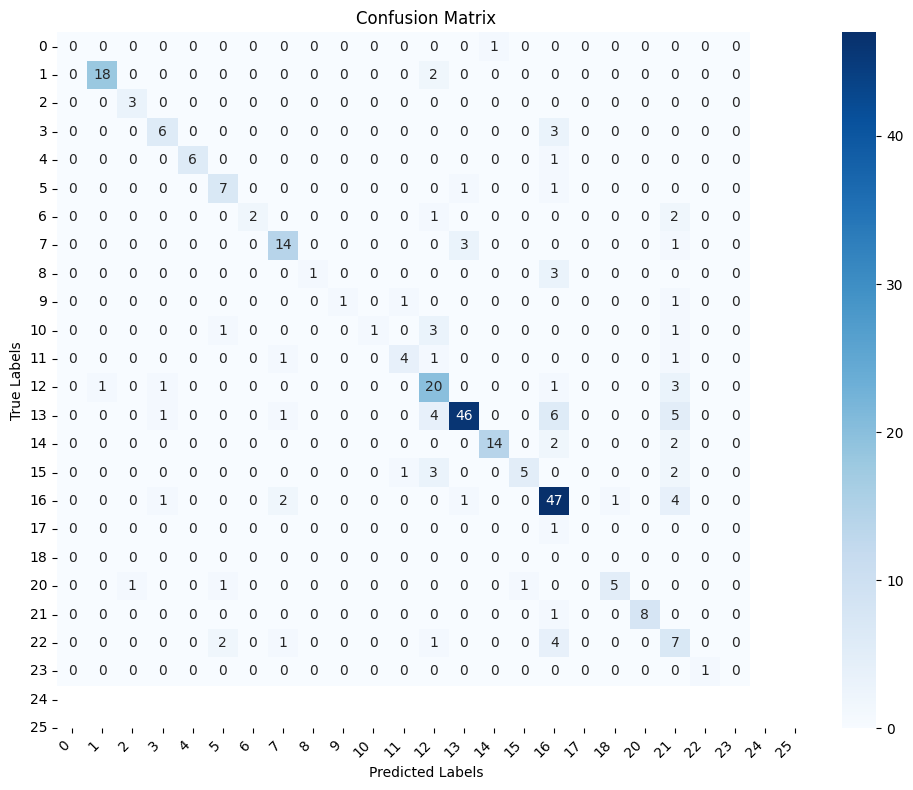

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x untuk tampilan yang lebih baik
plt.yticks(rotation=0)  # Pastikan label sumbu y terbaca
plt.tight_layout() # Sesuaikan tata letak agar label tidak terpotong
plt.show()

Plot akurasi dan loss selama training ditampilkan untuk memvisualisasikan proses pembelajaran model.  Ini membantu untuk melihat apakah model overfitting atau underfitting.

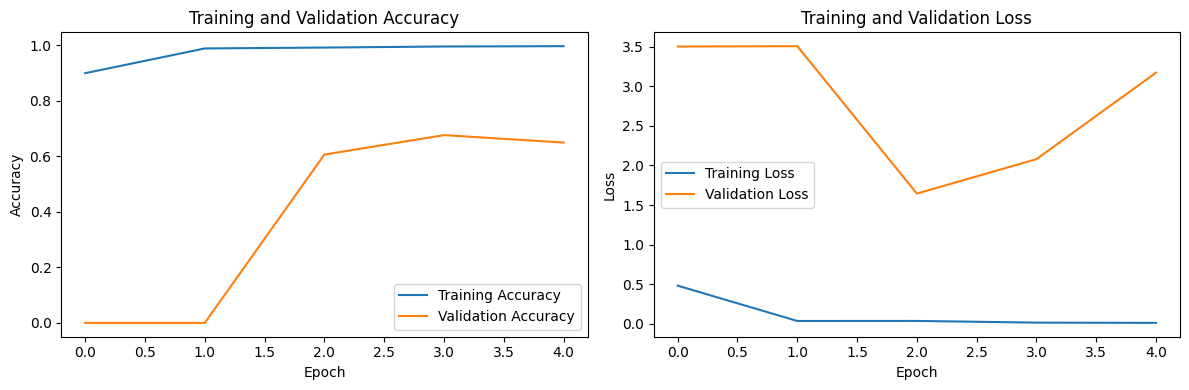

In [ ]:
# Plot akurasi dan loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Saving Model

Model yang sudah dilatih disimpan ke dalam file 'cnn_model.keras' agar dapat digunakan kembali nanti tanpa perlu melatih ulang.

In [ ]:
model.save('cnn_model.keras')

### Testing with New Data

In [ ]:
# Contoh penggunaan model untuk prediksi teks baru
def predict_new_text(text, vectorizer, model, label_encoder):
    text_cleaned = text # Pada kasus ini, kita asumsikan teks sudah bersih
    text_tfidf = vectorizer.transform([text_cleaned]).toarray()
    text_padded = text_tfidf.reshape(text_tfidf.shape[0], max_length, 1)
    prediction = model.predict(text_padded)
    predicted_label = np.argmax(prediction, axis=1)
    return label_encoder.inverse_transform(predicted_label)[0]

In [ ]:
# contoh teks
new_text = "kekayaan Prajogo diperkirakan mencapai 53,6 miliar dollar AS atau sekitar Rp 850,05 triliun"
predicted_category = predict_new_text(new_text, vectorizer, model, label_encoder)
print(f"Kategori Berita yang diprediksi: {predicted_category}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
Kategori Berita yang diprediksi: 14
